In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('heart.xlsx')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

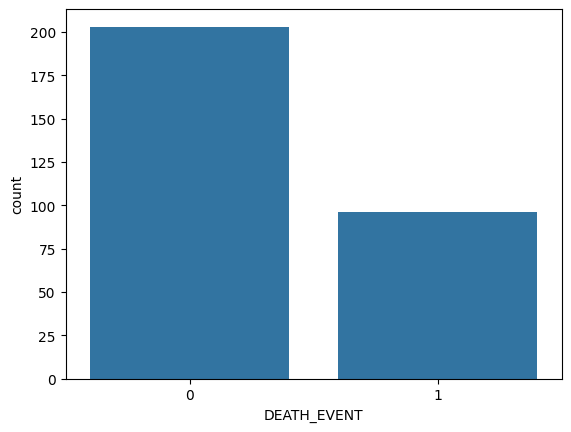

In [7]:
#sns.countplot(df.DEATH_EVENT)
sns.countplot(x=df['DEATH_EVENT'])


<Axes: xlabel='diabetes', ylabel='count'>

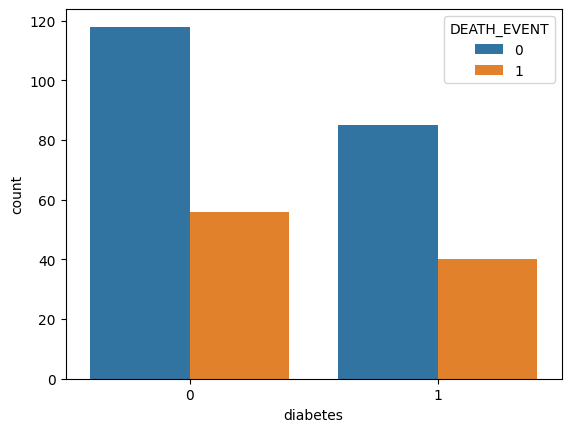

In [8]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=df)

<Axes: xlabel='high_blood_pressure', ylabel='count'>

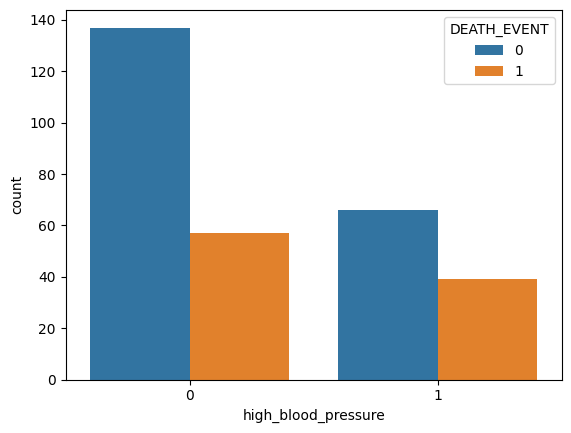

In [9]:
sns.countplot(x='high_blood_pressure',hue='DEATH_EVENT',data=df)

In [10]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: title={'center': 'Correlation for every column'}>

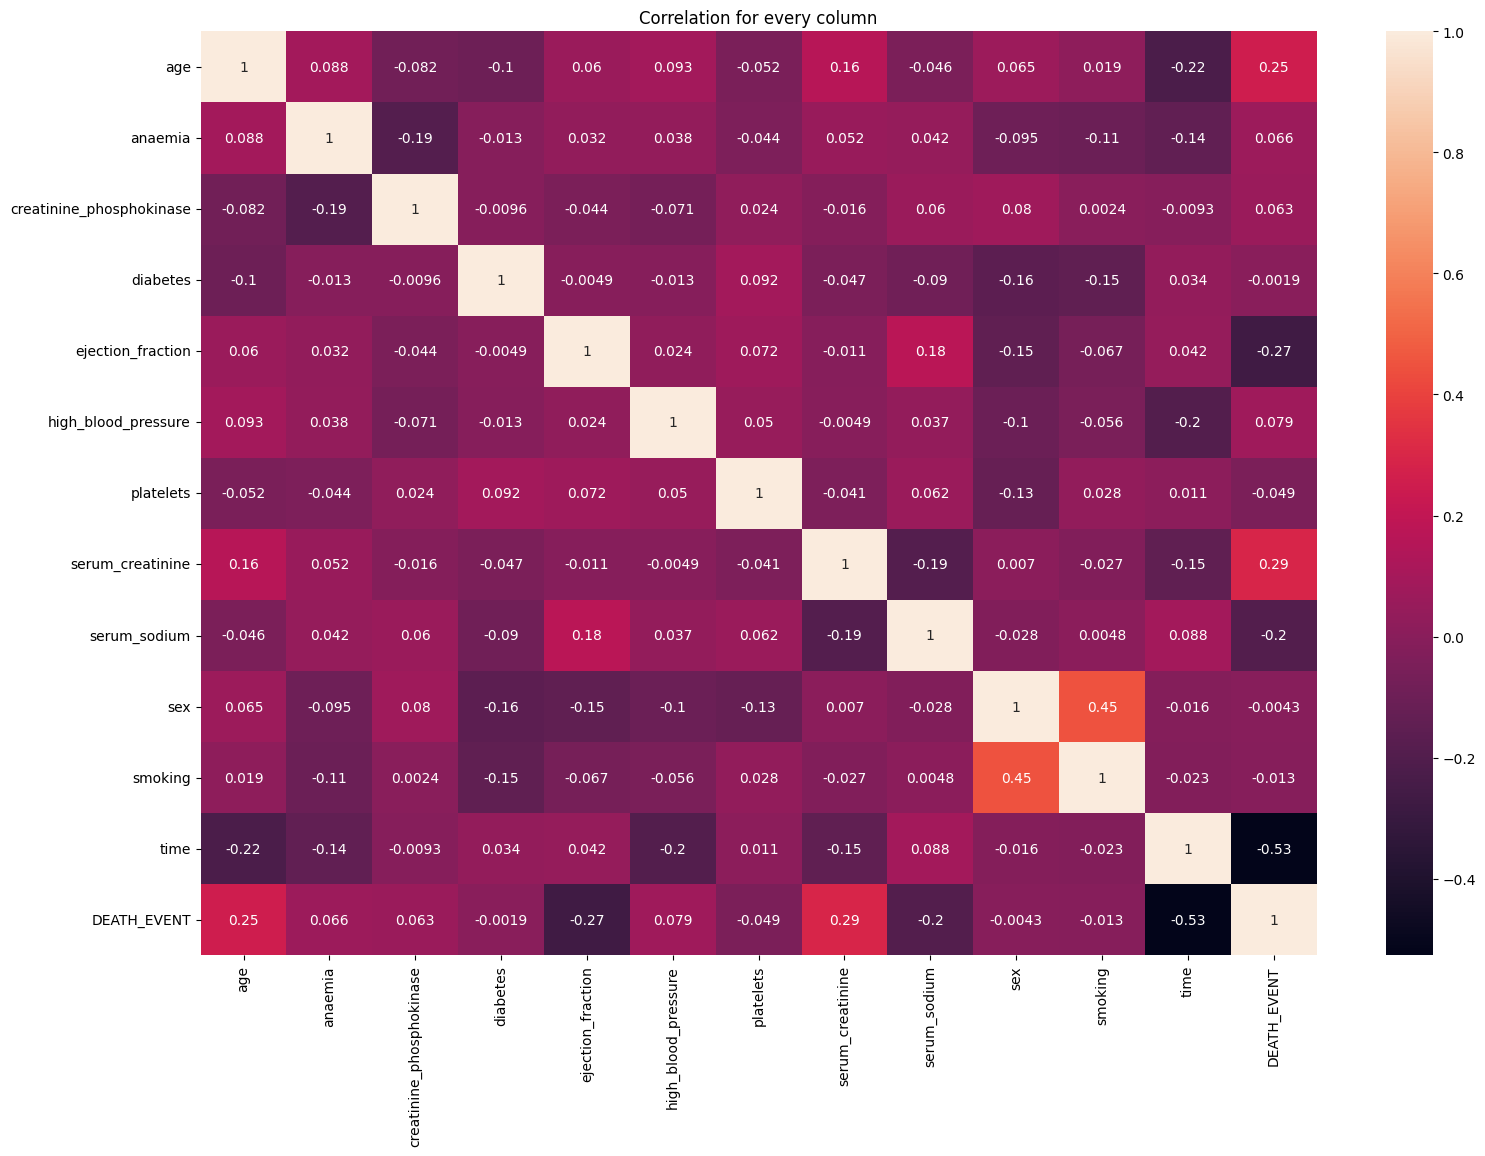

In [11]:
plt.figure(figsize=(18,12))
plt.title('Correlation for every column')
sns.heatmap(df.corr(),annot=True)

# Separete X,Y

In [12]:
x = df.drop('DEATH_EVENT',axis=1)

In [13]:
y=df[['DEATH_EVENT']]

In [14]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [15]:
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [16]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=42)

In [17]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0,30
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14


In [18]:
ytrain.head()

,DEATH_EVENT
224,0
68,1
222,0
37,1
16,1


In [19]:
xtrain.shape

(209, 12)

In [20]:
xtest.shape

(90, 12)

In [21]:
dt = DecisionTreeClassifier()

In [22]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

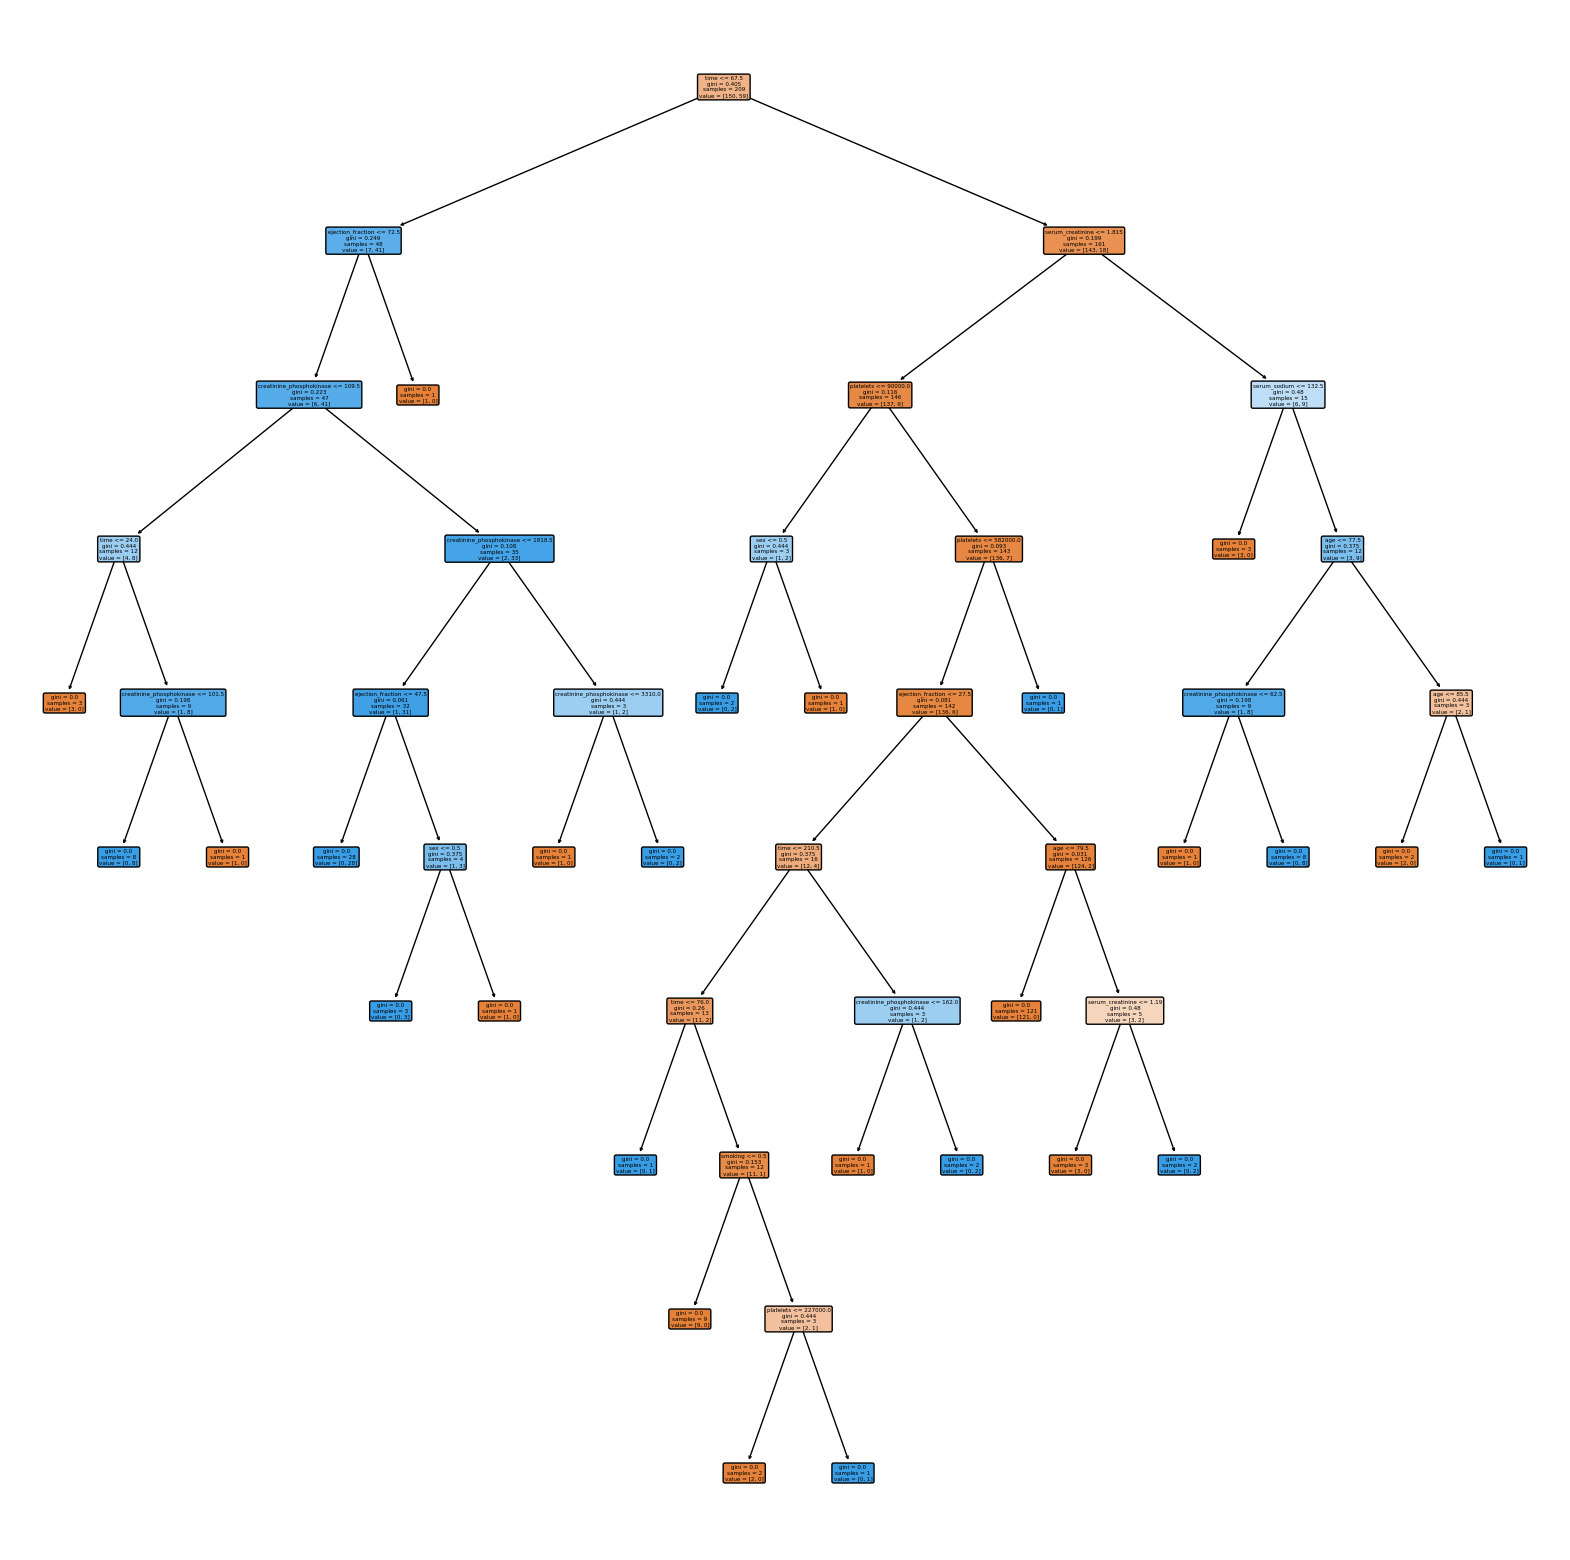

In [23]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt,filled=True,rounded=True,feature_names=x.columns)
plt.savefig('tree.png',dpi=1200)

In [24]:
pred = dt.predict(xtest)

In [25]:
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [26]:
np.array(ytest)

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

# Confusion Matrix

In [27]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.69      0.79      0.74        53\n           1       0.62      0.49      0.55        37\n\n    accuracy                           0.67        90\n   macro avg       0.65      0.64      0.64        90\nweighted avg       0.66      0.67      0.66        90\n'

In [28]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74        53
           1       0.62      0.49      0.55        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.64        90
weighted avg       0.66      0.67      0.66        90



In [29]:
cm = confusion_matrix(ytest,pred)

In [30]:
cm

array([[42, 11],
       [19, 18]], dtype=int64)

Text(0.5, 1.0, 'confusion matrix')

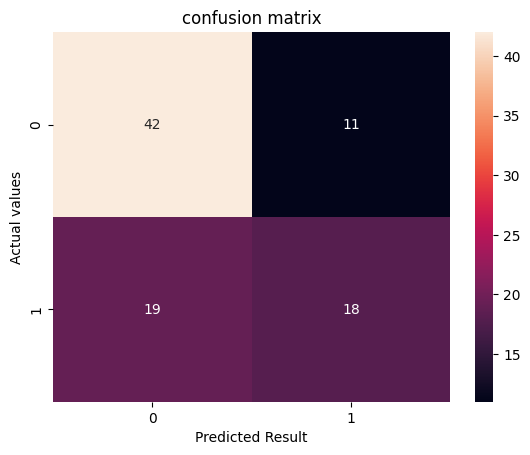

In [31]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual values')
plt.title('confusion matrix')

In [32]:
tp,fn,fp,tn = confusion_matrix(ytest,pred).reshape(-1)

In [33]:
tp

42

In [34]:
fn

11

In [35]:
fp

19

In [36]:
tn

18

In [37]:
accuracy = (tp+tn)/(tp+fp+fn+tn)

In [38]:
accuracy

0.6666666666666666

In [39]:
precision = tp/(tp+fp)

In [40]:
precision

0.6885245901639344

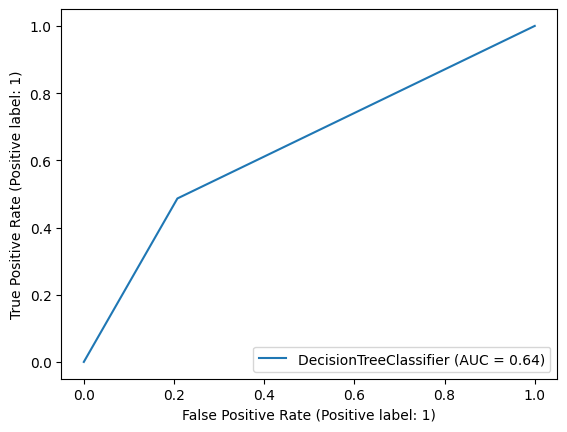

In [45]:
#from sklearn.metrics import plot_roc_curve as pc
#pc(dt,xtest,ytest)

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt, xtest, ytest)
plt.show()


In [44]:
accuracy_score(ytest,pred)

0.6666666666666666

In [42]:
dt.score(xtest,ytest)

0.6666666666666666

# Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
{'n_estimators': 135,
 'min_samples_split': 3,
 'max_features': 'log2',
 'max_depth': 11,
 'criterion': 'entropy'}

{'n_estimators': 135,
 'min_samples_split': 3,
 'max_features': 'log2',
 'max_depth': 11,
 'criterion': 'entropy'}

In [48]:
rf = RandomForestClassifier(n_estimators=135,min_samples_split=3,max_depth=11,max_features='log2',criterion='entropy')

In [49]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_split=3, n_estimators=135)

In [50]:
rf.score(xtest,ytest)

0.7666666666666667

# Random Search CV

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
tree = np.random.randint(15,150,30) #15 theke 150 er moddhe 30 ta tree generate korbe

In [53]:
tree

array([ 57,  61,  57,  89,  87, 130, 133, 106,  38,  17,  59, 112,  87,
        90,  41, 145,  59,  99,  76,  78,  46, 102,  79,  26,  20, 133,
        92,  25,  43, 142])

In [54]:
max_features = ['sqrt','log2']  ## split kore dataset
max_depth = np.random.randint(2,12,50)  
criterion = ['gini','entropy']
min_samples_split = [2,3,4]

grid = {
    
    'n_estimators' : tree,   #no of tree
    'criterion' : criterion,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
    
}


In [55]:
print(grid)

{'n_estimators': array([ 57,  61,  57,  89,  87, 130, 133, 106,  38,  17,  59, 112,  87,
        90,  41, 145,  59,  99,  76,  78,  46, 102,  79,  26,  20, 133,
        92,  25,  43, 142]), 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'max_depth': array([ 9,  5,  7,  2,  8,  5,  9,  9,  7, 10, 10, 11, 11,  7,  5,  5, 10,
       10,  8, 10,  4,  2, 10,  5,  7, 10,  4,  8,  4,  6,  3,  4,  9, 10,
        3,  8,  9,  9,  2, 11,  9,  3,  3, 10,  3, 10,  4, 11,  7,  9]), 'min_samples_split': [2, 3, 4]}


In [56]:
rcv = RandomizedSearchCV(rf,grid,n_iter=100,cv=3)

In [57]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=11,
                                                    max_features='log2',
                                                    min_samples_split=3,
                                                    n_estimators=135),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 9,  5,  7,  2,  8,  5,  9,  9,  7, 10, 10, 11, 11,  7,  5,  5, 10,
       10,  8, 10,  4,  2, 10,  5,  7, 10,  4,  8,  4,  6,  3,  4,  9, 10,
        3,  8,  9,  9,  2, 11,  9,  3,  3, 10,  3, 10,  4, 11,  7,  9]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([ 57,  61,  57,  89,  87, 130, 133, 106,  38,  17,  59, 112,  87,
        90,  41, 145,  59,  99,  76,  78,  46, 102,  79,  26,  20, 133,
        92,  25,  43, 142])})

In [58]:
rcv.cv_results_

{'mean_fit_time': array([0.12044994, 0.067916  , 0.02843865, 0.09123635, 0.15386701,
        0.12012227, 0.03139257, 0.09674931, 0.05166992, 0.10466735,
        0.04794757, 0.0448877 , 0.05020205, 0.05489763, 0.17289861,
        0.11607647, 0.02283478, 0.11358595, 0.02804661, 0.15300393,
        0.02317842, 0.03305189, 0.10085344, 0.05630136, 0.05440887,
        0.15651011, 0.14457091, 0.06390397, 0.10131542, 0.10114535,
        0.03002612, 0.10160526, 0.02807045, 0.03241412, 0.02851693,
        0.02178939, 0.06257558, 0.13232017, 0.04802648, 0.08095185,
        0.08939528, 0.14135893, 0.02527396, 0.15566222, 0.14114118,
        0.06701271, 0.09903097, 0.09132465, 0.06673439, 0.10035268,
        0.0437572 , 0.0662593 , 0.15651536, 0.0454541 , 0.15002505,
        0.09635592, 0.08810385, 0.09836562, 0.10833804, 0.04629151,
        0.14259688, 0.02262942, 0.018852  , 0.05276664, 0.03011417,
        0.11368251, 0.05625923, 0.14345964, 0.06291747, 0.08368913,
        0.0316263 , 0.15530419,

In [59]:
tuning_result = pd.DataFrame(rcv.cv_results_)

In [60]:
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.120450,0.052340,0.020124,0.018296,59,4,log2,8,entropy,"{'n_estimators': 59, 'min_samples_split': 4, '...",0.828571,0.957143,0.869565,0.885093,0.053625,4
1,0.067916,0.003391,0.006680,0.000934,57,2,log2,9,gini,"{'n_estimators': 57, 'min_samples_split': 2, '...",0.842857,0.914286,0.855072,0.870738,0.031194,22
2,0.028439,0.001622,0.003771,0.000539,25,3,log2,7,entropy,"{'n_estimators': 25, 'min_samples_split': 3, '...",0.842857,0.942857,0.826087,0.870600,0.051550,34
3,0.091236,0.003954,0.008346,0.001795,78,3,log2,9,gini,"{'n_estimators': 78, 'min_samples_split': 3, '...",0.800000,0.957143,0.855072,0.870738,0.065103,22
4,0.153867,0.011173,0.010945,0.000738,133,4,log2,3,gini,"{'n_estimators': 133, 'min_samples_split': 4, ...",0.828571,0.942857,0.884058,0.885162,0.046663,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.050173,0.001971,0.005089,0.000072,46,3,log2,11,gini,"{'n_estimators': 46, 'min_samples_split': 3, '...",0.800000,0.928571,0.840580,0.856384,0.053665,80
96,0.064778,0.004106,0.006291,0.000213,57,3,log2,10,gini,"{'n_estimators': 57, 'min_samples_split': 3, '...",0.828571,0.942857,0.840580,0.870669,0.051279,28
97,0.067371,0.002599,0.006450,0.001020,61,4,log2,10,entropy,"{'n_estimators': 61, 'min_samples_split': 4, '...",0.828571,0.942857,0.869565,0.880331,0.047274,6
98,0.141118,0.006816,0.010349,0.000641,130,4,sqrt,11,entropy,"{'n_estimators': 130, 'min_samples_split': 4, ...",0.814286,0.942857,0.855072,0.870738,0.053645,22


In [61]:
rcv.best_score_

0.8946859903381643

In [62]:
rcv.best_params_

{'n_estimators': 112,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'entropy'}

In [63]:
rcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=4,
                       n_estimators=112)

In [64]:
rcv2 = rcv.best_estimator_

In [65]:
rcv2.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=4,
                       n_estimators=112)

In [66]:
rcv2.score(xtest,ytest)

0.7777777777777778

In [67]:
rcv2.base_estimator_

DecisionTreeClassifier()

In [68]:
rf.fit

<bound method BaseForest.fit of RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_split=3, n_estimators=135)>